# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/nationalparkservice/park-biodiversity

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [19]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sp_df = pd.read_csv("species.csv")
pa_df = pd.read_csv("parks.csv")

# checking to see if nulls are present in both dataframes
sp_df.info()
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
pa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119248 entries, 0 to 119247
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Species ID           119248 non-null  object
 1   Park Name            119248 non-null  object
 2   Category             119248 non-null  object
 3   Order                117776 non-null  object
 4   Family               117736 non-null  object
 5   Scientific Name      119248 non-null  object
 6   Common Names         119248 non-null  object
 7   Record Status        119248 non-null  object
 8   Occurrence           99106 non-null   object
 9   Nativeness           94203 non-null   object
 10  Abundance            76306 non-null   object
 11  Seasonality          20157 non-null   object
 12  Conservation Status  4718 non-null    object
 13  Unnamed: 13          5 non-null       object
dtypes: object(14)
memory usage: 12.7+ MB
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

C:\Users\kelle\AppData\Local\Temp\ipykernel_5844\3085058427.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  sp_df = pd.read_csv("species.csv")


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [20]:
# for species dataframe - checking info
sp_df.describe()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
count,119248,119248,119248,117776,117736,119248,119248,119248,99106,94203,76306,20157,4718,5
unique,119248,56,14,554,2332,46022,35826,54,7,5,8,24,11,3
top,ACAD-1000,Great Smoky Mountains National Park,Vascular Plant,Poales,Asteraceae,Falco peregrinus,None,Approved,Present,Native,Unknown,Breeder,Species of Concern,Threatened
freq,1,6623,65221,11453,8843,56,27147,86254,83278,75950,28119,12214,3843,2


In [24]:
# for species dataframe - checking first 5 rows
sp_df.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [25]:
# for species dataframe - checking last 5 rows
sp_df.tail()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,NaN,NaN,NaN
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,NaN,NaN,NaN
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,NaN,NaN,NaN
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,NaN,NaN,NaN
119247,ZION-2795,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Tribulus terrestris,Puncture Vine,Approved,Present,Not Native,Uncommon,NaN,NaN,NaN


In [41]:
# for species dataframe - only showing the columns that will be relevent to this project
sp_main = sp_df[['Park Name','Scientific Name']]
sp_main.head(20)

,Park Name,Scientific Name
0,Acadia National Park,Alces alces
1,Acadia National Park,Odocoileus virginianus
2,Acadia National Park,Canis latrans
3,Acadia National Park,Canis lupus
4,Acadia National Park,Vulpes vulpes
5,Acadia National Park,Lynx canadensis
6,Acadia National Park,Lynx rufus
7,Acadia National Park,Mephitis mephitis
8,Acadia National Park,Lutra canadensis
9,Acadia National Park,Martes pennanti


In [33]:
# for parks dataframe - checking info
pa_df.describe()

,Acres,Latitude,Longitude
count,5.600000e+01,56.000000,56.000000
mean,9.279291e+05,41.233929,-113.234821
std,1.709258e+06,10.908831,22.440287
min,5.550000e+03,19.380000,-159.280000
25%,6.901050e+04,35.527500,-121.570000
50%,2.387645e+05,38.550000,-110.985000
75%,8.173602e+05,46.880000,-103.400000
max,8.323148e+06,67.780000,-68.210000


In [34]:
# for parks dataframe - checking first 5 rows
pa_df.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [35]:
# for parks dataframe - checking last 5 rows
pa_df.tail()

,Park Code,Park Name,State,Acres,Latitude,Longitude
51,WICA,Wind Cave National Park,SD,28295,43.57,-103.48
52,WRST,Wrangell - St Elias National Park and Preserve,AK,8323148,61.00,-142.00
53,YELL,Yellowstone National Park,"WY, MT, ID",2219791,44.60,-110.50
54,YOSE,Yosemite National Park,CA,761266,37.83,-119.50
55,ZION,Zion National Park,UT,146598,37.30,-113.05


In [42]:
# for parks dataframe - only showing the columns that will be relevent to this project
pa_main = pa_df[['Park Name','Acres']]
pa_main.head()


,Park Name,Acres
0,Acadia National Park,47390
1,Arches National Park,76519
2,Badlands National Park,242756
3,Big Bend National Park,801163
4,Biscayne National Park,172924


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

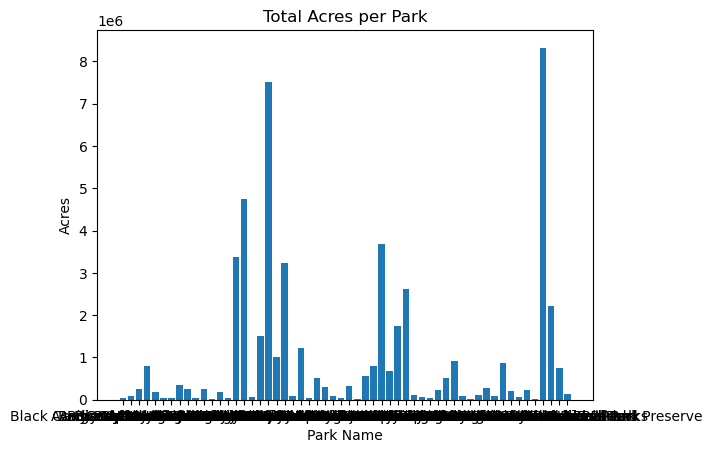

In [49]:
# bar chart showing park acreage 
x = pa_main["Park Name"]
y = pa_main["Acres"]
plt.bar(x,y)
plt.title("Total Acres per Park")
plt.xlabel('Park Name')
plt.ylabel('Acres')
plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
    
    • The number of plant species versus animals
_______________________________________________________
       
2. Do you have any concerns about your dataset? 

    • The only concerns I had were that there were several columns with a large amount of null values. However, 
      after looking at the dataframes further, I realized these columns would not be needed for this project. 
_______________________________________________________
      
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

    • There are several columns that contain null values that can be deleted.
    
    • I will need to check for duplicates
    
    • I know I will use the Scientific Names but I will also need to research and decide whether it will be best 
      to break down the dataframe by just that or also by Category, Order, and Family.